# Project FoodHub Data Analysis using Data Visualization methodology

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. You are hired as a Data Scientist in this company to help improve their business.

#### Suggestion
Your task is to ask yourself key questions and answer them to help the company to improve their business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [22]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

cfg = None
from hydra import initialize, compose

with initialize(version_base=None, config_path="../config/"):
    cfg = compose(config_name='main.yaml')

### Understanding the structure of the data

In [23]:
# read the data
df = pd.read_csv(f'../{cfg.data.project}')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [24]:
# Get last 5 rows of the dataframe
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

In [25]:
# Get the dimensions of the data frame
df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows and 9 columns in the data.


### What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [26]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [27]:
print(f'We have {df.restaurant_name.nunique()} unique restaurants in the dataset')
print(f'We have {df.cuisine_type.nunique()} unique cuisines in the dataset')

We have 178 unique restaurants in the dataset
We have 14 unique cuisines in the dataset


#### Observations:
DataFrame has three differeent types of data:
- float64: 1 columns
    - Cost of the order: Which is the dollar amount including decimal points for cents
- int64: 4 columns
    - Order ID
    - Customer ID
    - Food preparation time
    - Food delivery time
- Object: 4 columns
    - Restaurant Name
    - Cuisine Type
    - Day of the week (Weekday/Weekend)
    - Rating (Suppose to be Numeric value from 0 to 5 (below average to extraordinary) , however there are some data registered as 'Not Given', for which user has not rated the the restaurant)

### Are there any missing values in the data? If yes, treat them using an appropriate method.

In [28]:
# Check if any of the features are null from the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing data in the dataframe.


### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [29]:
# Get the description of the dataframe
df[['cost_of_the_order','food_preparation_time','delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:

From the above data:
 - we can see that the minimum time it takes for food to be prepared is 20 minutes, the average time it takes for food to prepared is ~27 minutes and the maximum time it takes for food to be prepared is 35 minutes. Standard deviation is ~4.6 minutes, means the spread is not huge.
 - the fastest delivery time for a food is 15 minutes, the average time it takes for food to be delivered is ~24 minutes and it takes as long as 33 minutes for the food to be delivered. Standard deviation is ~5 minutes, means the spread is not huge.
 - The minimum cost of the food ordered is around 4.47 dollars and the maxium being around 35.41 dollars. The Standard deviation is around 7.48 dollars, denotes the spread is higher compared to the mean.

### How many orders are not rated?

In [30]:
# Group the dataframe based on rating and determine percentage of ratings not rated from the dataset.
print(df.groupby('rating')['rating'].count())
print(f"Total percentage of unrated orders: {len(df[df['rating'] == 'Not given'])/len(df) * 100:.2f}%")

rating
3            188
4            386
5            588
Not given    736
Name: rating, dtype: int64
Total percentage of unrated orders: 38.78%


#### Observations:
There are total of 736 orders not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [31]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    print(f'Mean: {np.mean(feature):.2f} and Median: {np.median(feature):.2f}')

    plt.show()

def bar_perc(data_org, z):
    """ Count/Bar plot with percentage of data
    data_org: Dataset to be plotted
    z: feature or column of interest to be plotted
    """
    # Since there is data manipulation here, we need to copy the data
    data = data_org.copy()
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
    plt.xticks(rotation=45)
    plt.show() 

Mean: 16.50 and Median: 14.14


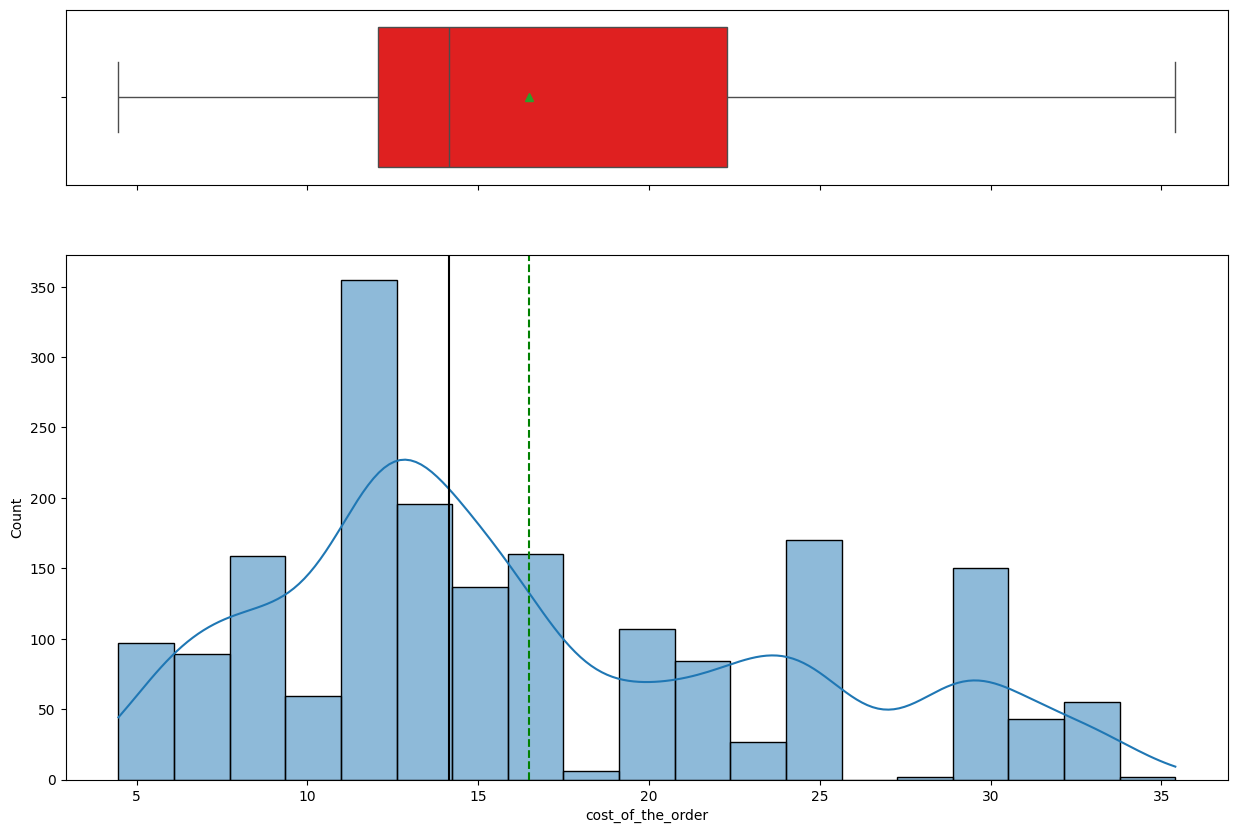

In [32]:
# Observations on cost of the order
histogram_boxplot(df.cost_of_the_order)

#### Observations:
- The distribution of cost of the order is right-skewed.
- The majority of the order prices are between 10 and 16 dollars.
- For one particular order value i.e. 11 dollar we are seeing count as high as 350 orders
- The median of the cost of the order is around 14 dollars.
- There are no outliers in the dataset.


Mean: 27.37 and Median: 27.00


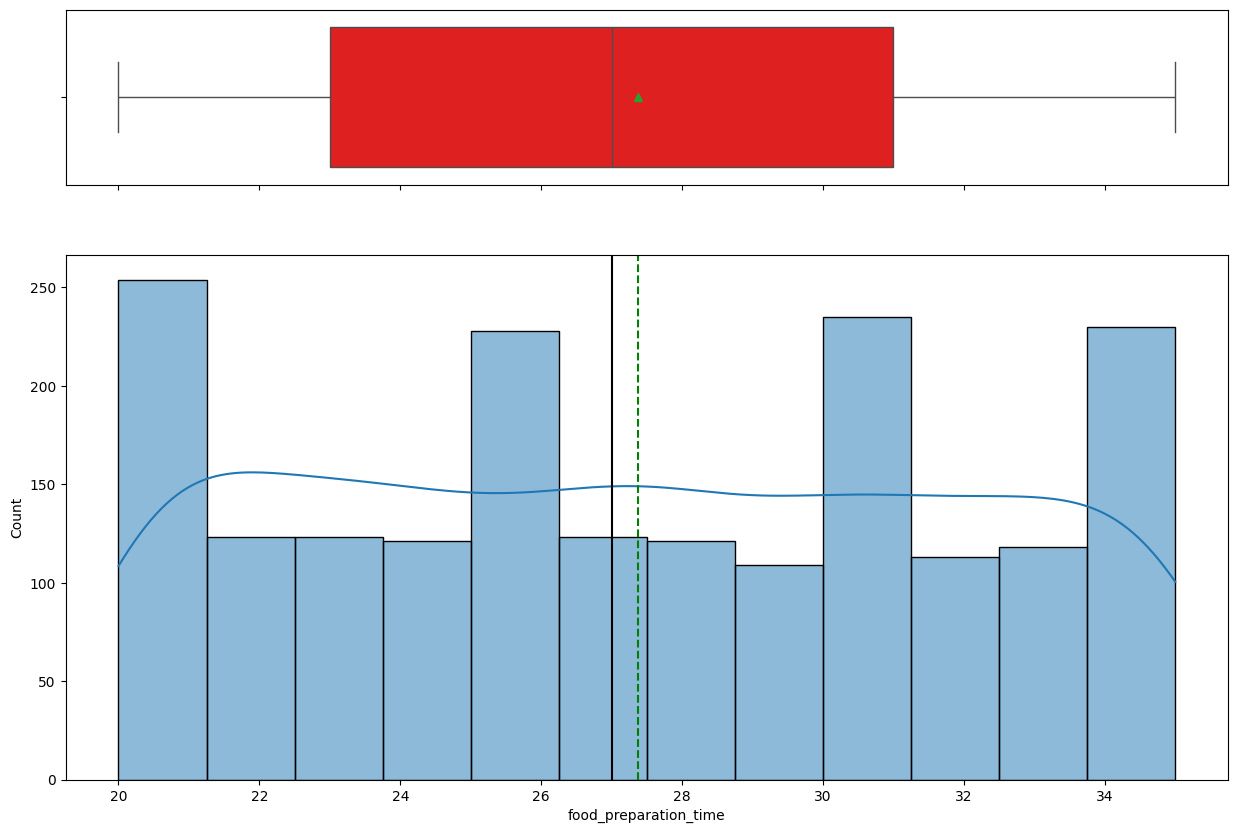

In [33]:
# Observations on food preparation time
histogram_boxplot(df.food_preparation_time)

#### Observations:
- The distribution is kind of symmetrical.
- The median and mean are close.
- There are no outliers in the dataset.

Mean: 24.16 and Median: 25.00


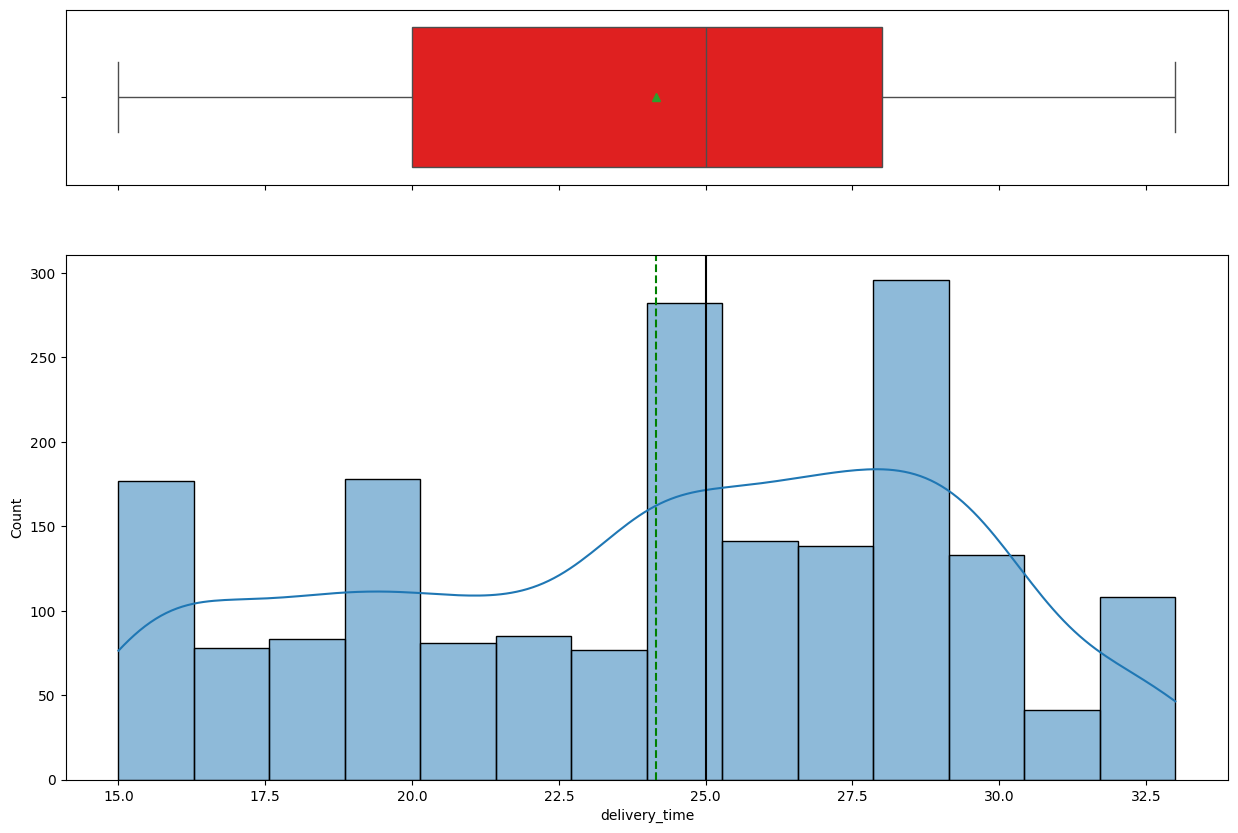

In [34]:
# Observations on delivery time
histogram_boxplot(df.delivery_time)

#### Observations:
- Interesting median is left to mean, which mean the data is slightly left skewed.
- On an average the delivery time is about 25 minutes.
    - We could have had a slightly better understanding if we had distance as a feature.


Least Ordered/Popular restaurants:109
Restaurants with just one order:50
Percentage of Restaurants with less than 5 orders:5.74%


/var/folders/_x/tvhb72hd0c9bv301cycvcksr0000gn/T/ipykernel_42876/2353700296.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


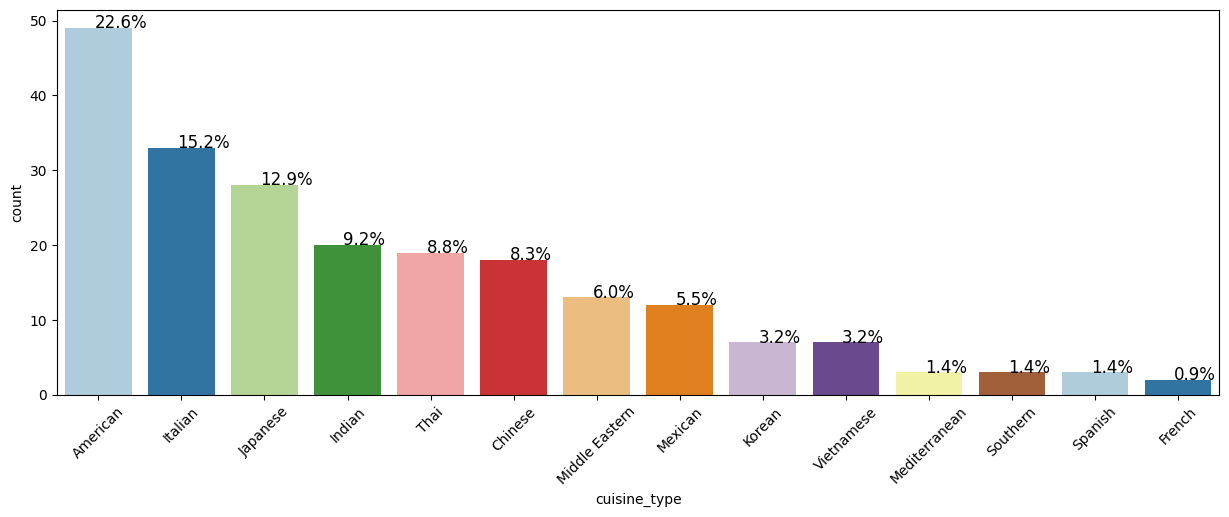

In [36]:
# Number of restaurants in the dataset with less than 5 orders
least_order = df['restaurant_name'].value_counts().sort_values()
print(f'\nLeast Ordered/Popular restaurants:{least_order[least_order<5].count()}')
print(f'Restaurants with just one order:{least_order[least_order==1].count()}')
print(f'Percentage of Restaurants with less than 5 orders:{least_order[least_order<5].count()/len(df)*100:.2f}%')

# Restaurants distribution by type of Cuisine
rest_list = list(dict(least_order[least_order<5]).keys())
df_least_rest = df[df['restaurant_name'].isin(rest_list)]
bar_perc(df_least_rest, 'cuisine_type')


#### Observations:
- We have around 109 restaurants with less than 5 orders and 50 restaurants with just one order.

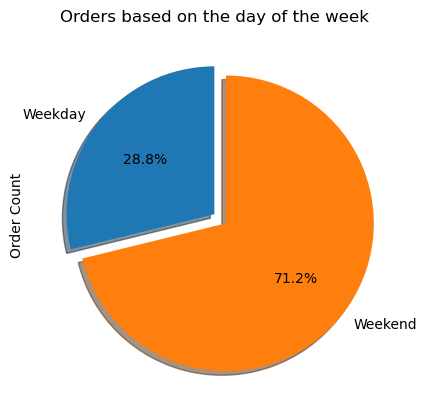

In [16]:
# Pie chart to visualize the number of orders based on day of the week i.e. weekday or weekend
df_pie = pd.DataFrame({'order_day': ['Weekday', 'Weekend'], 
                       'Order Count':[df[df['day_of_the_week']=='Weekday'].value_counts().count(),
                               df[df['day_of_the_week']=='Weekend'].value_counts().count()]})
df_pie.set_index('order_day', inplace=True)
df_pie.plot.pie(y='Order Count', title='Orders based on the day of the week',
                legend=False, autopct='%1.1f%%', explode=(0, 0.1), 
                shadow=True, startangle=90)
plt.show()

#### Observations:
- Most of the orders i.e. 71.2% are in the weekends

#### Lets explore categorical variables of the dataset

/var/folders/_x/tvhb72hd0c9bv301cycvcksr0000gn/T/ipykernel_42876/2353700296.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


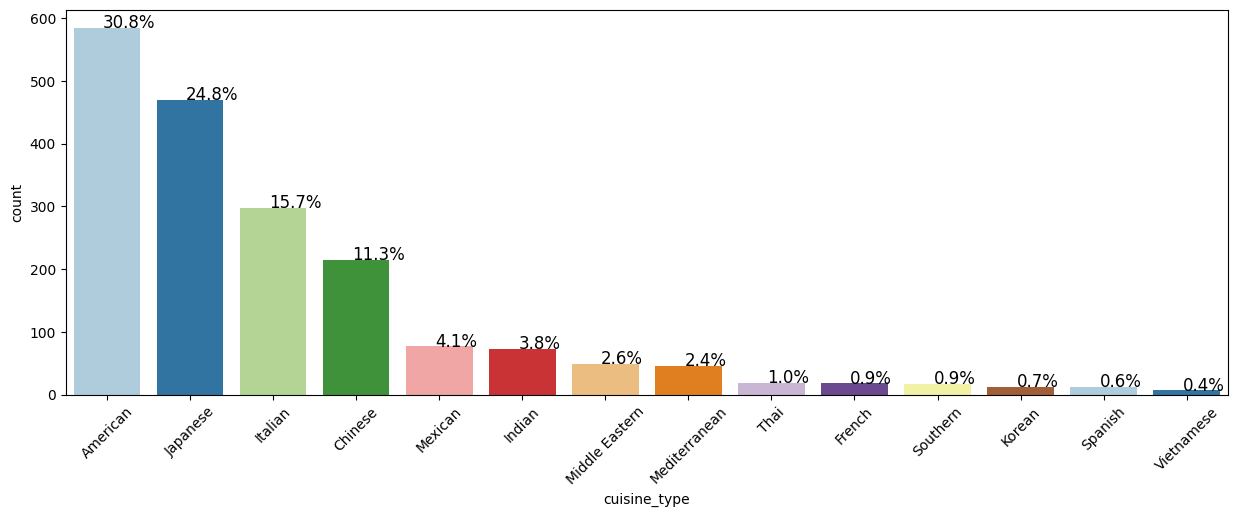

In [37]:
# Explore cuisine_type variable
bar_perc(df, 'cuisine_type')

#### Observations:
- 50% of the orders were made in the "American" and "Japanese" category
- Along with "Italian" and "Chinese", 75% of the orders falls in this category
- "Vietnamese" and "Spanish" are the least popular categories

### Which are the top 5 restaurants in terms of the number of orders received?

In [18]:
# Top 5 restaurant names based on orders received
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

cuisine_type
American    219
dtype: int64

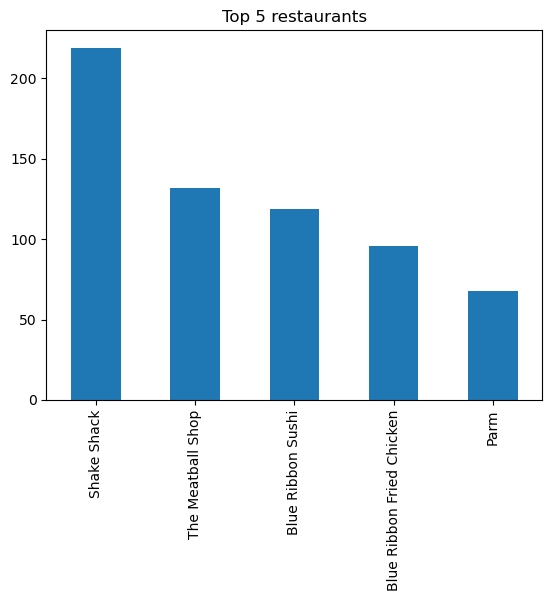

In [19]:
# Data visualization for top 5 restaurants
df['restaurant_name'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 restaurants')

# Top restaurant i.e. Shake Shack's  cuisine type
df[df['restaurant_name'] == 'Shake Shack'].groupby('cuisine_type').size().sort_values(ascending=False).head(1)

#### Observations:
- 'Shake Shack' is the most popular restaurant with > 200 orders for the given dataset.
- 'The Meatball Shop' is the second most popular restaurant with > 130 orders.
- 'Blue Ribbon Sushi' is the third most popular restaurant with > 100 orders.

### Which is the most popular cuisine on weekends?

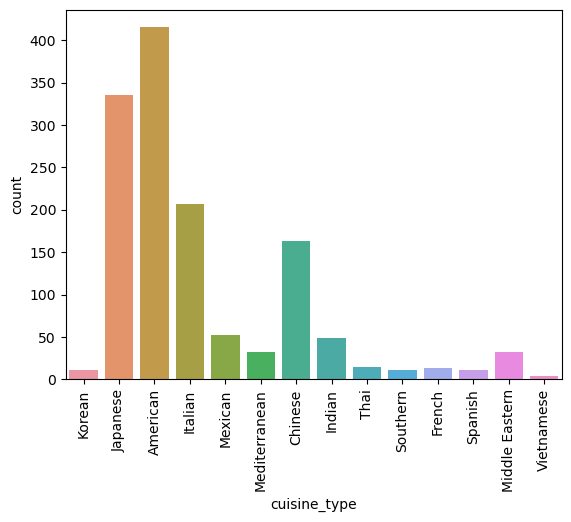

In [20]:
# Determine most popular cuisine types during weekend
sns.countplot(x='cuisine_type', data=df.loc[df['day_of_the_week']=='Weekend']);
plt.xticks(rotation=90)
plt.show()


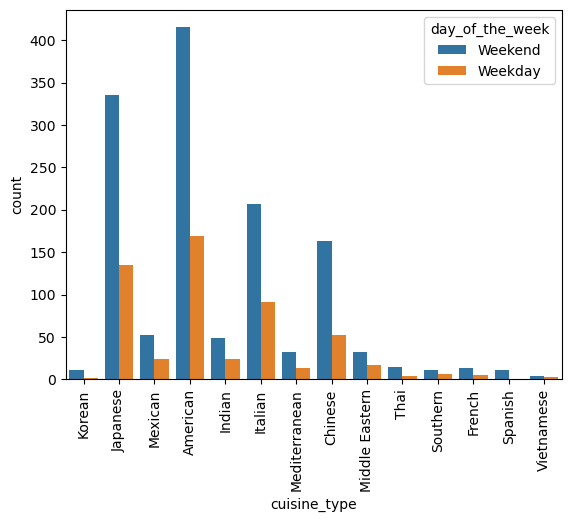

In [21]:
# Compare cuisine types based on day of the week
sns.countplot(x='cuisine_type', data=df, hue='day_of_the_week');
plt.xticks(rotation=90)
plt.show()

#### Observations:
- American is the most popular cuisine on weekends.
- Next comes Japanese and Italian and then Chinese.

### What percentage of the orders cost more than 20 dollars?

Percentage of orders costing more than 20 dollars: 29.24130663856691


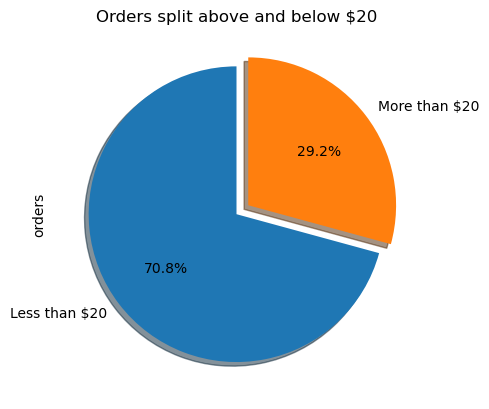

In [22]:
# Percentage of orders costing more than $20 = (Number of orders > $20 / Total number of orders) * 100
count_less_than_20 = df[df['cost_of_the_order'] <= 20].value_counts().count()
count_more_than_20 = df[df['cost_of_the_order'] > 20].value_counts().count()

order_percent = (count_more_than_20/df['cost_of_the_order'].count()) * 100
print(f"Percentage of orders costing more than 20 dollars: {order_percent}")

#Visual representation of the pie chart for orders costing more than 20 dollars and less.
df_pie = pd.DataFrame({'dollar_category': ['Less than $20', 'More than $20'], 'orders':[count_less_than_20, count_more_than_20]})
df_pie.set_index('dollar_category', inplace=True)
df_pie.plot.pie(y='orders', title='Orders split above and below $20',
                legend=False, autopct='%1.1f%%', explode=(0, 0.1), 
                shadow=True, startangle=90)
plt.show()



#### Observations:
- The majority of the orders cost less than $20
- we have about 30% of the orders costing more than $20


### What is the mean order delivery time?

In [23]:
# Mean order delivery time
print(f"Mean order delivery time: {df['delivery_time'].mean()}")

Mean order delivery time: 24.161749209694417


#### Observations:
- Mean order delivery time: 24.161749209694417

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [24]:
# Determine the top 3 customer ids with max number of orders
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

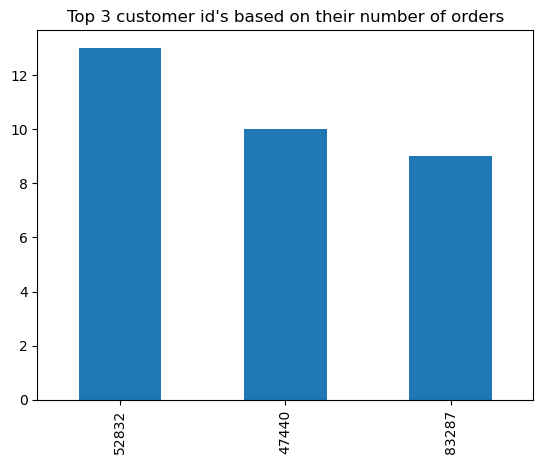

In [25]:
#Visualization of the customer id with maximum number of orders.
df['customer_id'].value_counts().head(3).plot(kind='bar')
plt.title("Top 3 customer id's based on their number of orders");

#### Observations:
- Customer id 52832 has placed 13 orders
- Customer id 47440 has placed 10 orders
- Customer id 83287 has placed 9 orders


### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


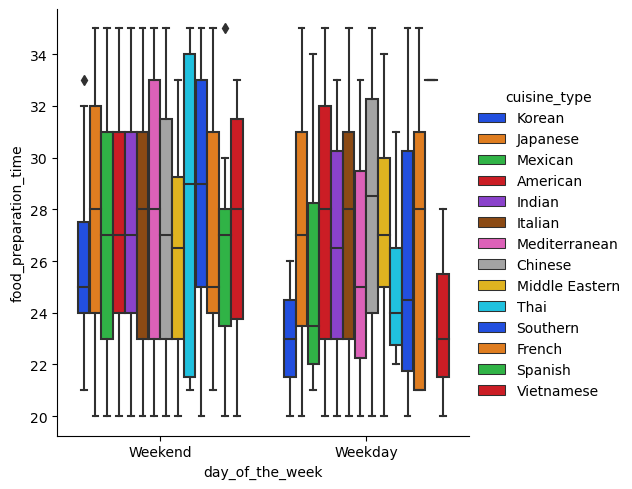

In [26]:
# Check for correlation among numerical variables
sns.catplot(data=df, x="day_of_the_week", y="food_preparation_time", hue="cuisine_type",kind='box', palette='bright');

#### Observations:
- Food preparation time during weekend and weekday varies based for the same type of cuisine

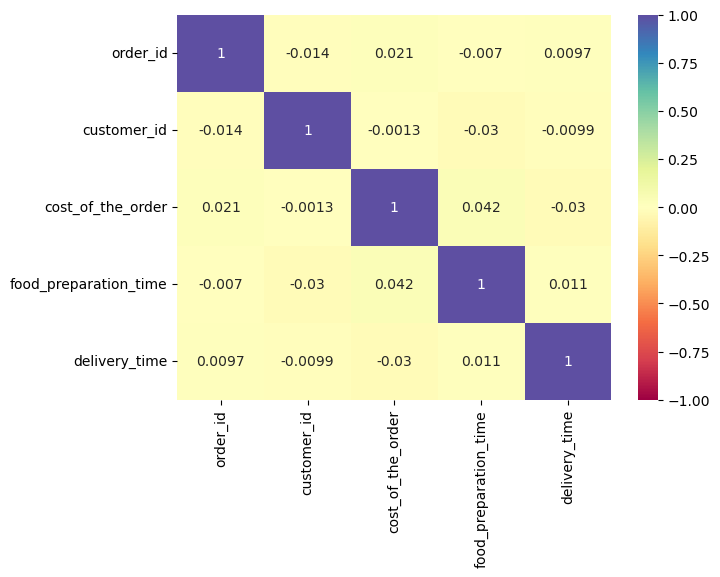

In [27]:
# Check for correlation among numerical variables
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:
- There are no strong corelation among the variables

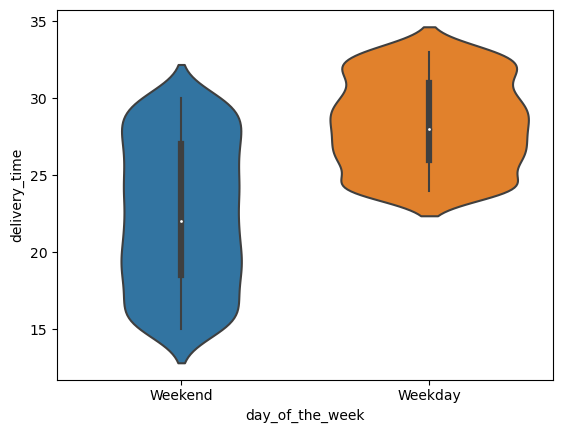

In [28]:
# Observations on delivery time
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', orient='v');

#### Observations:
- Weekday delivery takes longer than weekend delivery.
    - Maybe due to traffic conditions during weekdays 

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


array([[<Axes: title={'center': '47440'}>,
        <Axes: title={'center': '52832'}>],
       [<Axes: title={'center': '83287'}>,
        <Axes: title={'center': '250494'}>],
       [<Axes: title={'center': '259341'}>, <Axes: >]], dtype=object)

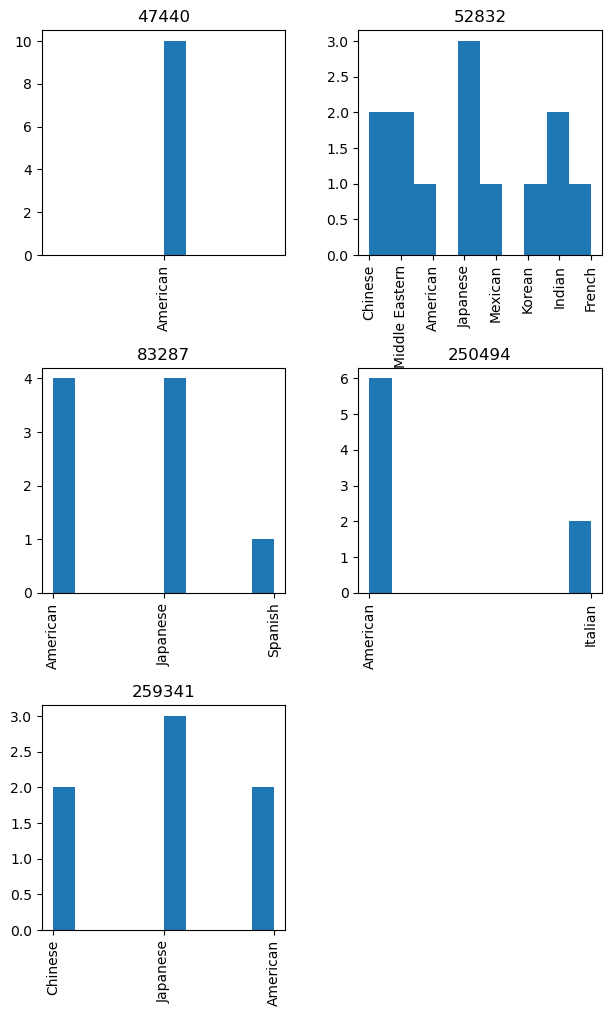

In [29]:
# Top 5 customers preference on custine type
top_cust = df['customer_id'].value_counts().head(5)
cust_list = list(dict(top_cust).keys())
df_top_cust = df[df['customer_id'].isin(cust_list)]
print(df_top_cust['customer_id'].value_counts())
df_top_cust.hist(by='customer_id',column = 'cuisine_type', figsize=(7,12))

#### Observations:
- Interestingly all top 5 customers prefer the American food.
- Customer 52832 has ordered food from most cuisines.
- Other customers has strong preference for few over the most others

In [30]:
# Remove the entries for rating not given
df_valid_rating = (df[df['rating']!= 'Not given']).copy()
df_valid_rating['rating'] = df_valid_rating['rating'].astype(int)
# Cuisine list based on number of ratings
top_cuisine = df_valid_rating['cuisine_type'].value_counts()
print(f'\nTop cuisine_type based on valid ratings:\n{top_cuisine}\n')


for cuisine in  list(dict(top_cuisine).keys()):
    print(f"{cuisine} cuisine has average rating:"
            f"{(df_valid_rating[df_valid_rating['cuisine_type'] == cuisine])['rating'].mean(): .2f} "
            f"(from {dict(top_cuisine).get(cuisine)} reviews)")


Top cuisine_type based on valid ratings:
American          368
Japanese          273
Italian           172
Chinese           133
Indian             50
Mexican            48
Middle Eastern     34
Mediterranean      32
Southern           13
French             10
Thai                9
Korean              9
Spanish             6
Vietnamese          5
Name: cuisine_type, dtype: int64

American cuisine has average rating: 4.30 (from 368 reviews)
Japanese cuisine has average rating: 4.37 (from 273 reviews)
Italian cuisine has average rating: 4.36 (from 172 reviews)
Chinese cuisine has average rating: 4.34 (from 133 reviews)
Indian cuisine has average rating: 4.54 (from 50 reviews)
Mexican cuisine has average rating: 4.42 (from 48 reviews)
Middle Eastern cuisine has average rating: 4.24 (from 34 reviews)
Mediterranean cuisine has average rating: 4.22 (from 32 reviews)
Southern cuisine has average rating: 4.31 (from 13 reviews)
French cuisine has average rating: 4.30 (from 10 reviews)
Thai cui

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.


Top Restaurants with more than 50 valid ratings:
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: restaurant_name, dtype: int64

Restaurant: 'Shake Shack' has average rating: 4.2781954887218046
Restaurant: 'The Meatball Shop' has average rating: 4.511904761904762
Restaurant: 'Blue Ribbon Sushi' has average rating: 4.219178082191781
Restaurant: 'Blue Ribbon Fried Chicken' has average rating: 4.328125


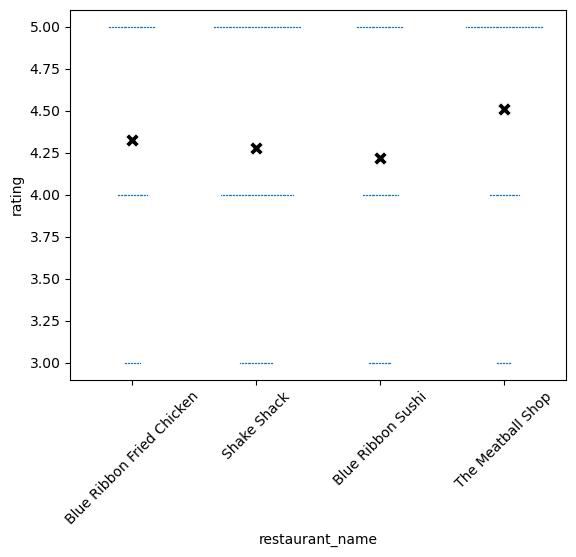

In [31]:
# Remove the entries for rating not given
df_valid_rating = df[df['rating']!= 'Not given']
# Pick the top restaurants with more than 50 orders in general with rating.
top_restaurants = df_valid_rating['restaurant_name'].value_counts()
print(f'\nTop Restaurants with more than 50 valid ratings:\n{top_restaurants[top_restaurants>50]}\n')

restaurant_list = list(dict(top_restaurants[top_restaurants>50]).keys())
#Get the dataset for only these top restaurants with valid ratings entries.
df_top_restaurants = df_valid_rating[df_valid_rating['restaurant_name'].isin(restaurant_list)]
# Copy the dataset to a new dataframe
df_top_rated_restaurants = df_top_restaurants.copy()
df_top_rated_restaurants['rating'] = df_top_rated_restaurants['rating'].astype(int)

for restaurant in restaurant_list:
    df_restaurant = df_top_rated_restaurants[df_top_rated_restaurants['restaurant_name'] == restaurant]
    print(f"Restaurant: '{restaurant}' has average rating: {df_restaurant['rating'].mean()}")

#Visual representation of the dataset
ax = sns.swarmplot(x="restaurant_name", y="rating", data=df_top_rated_restaurants, size=1)
df_means = df_top_rated_restaurants.groupby("restaurant_name")["rating"].agg("mean").reset_index()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.scatterplot(x="restaurant_name", y="rating", marker='X', color='black', s=100, zorder=3, ax=ax, legend=False, data=df_means)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xticks(rotation=45)
plt.show()



#### Observations:
- All the four restaurants which had valid 50+ customer rating has more than 4 avarage ratings
- The restaurant 'The Meatball Shop' has the highest average rating of 4.5 with atleast 84 registered ratings.


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

Net revenue generated by the company across all orders: 4514.586


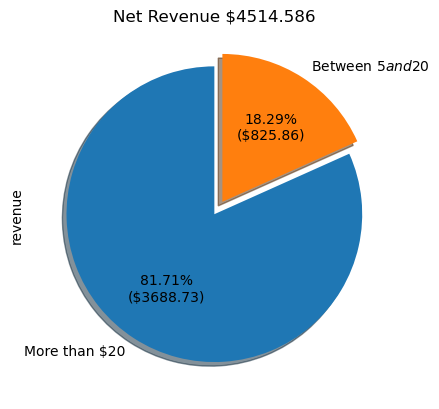

In [32]:
# 25% on the orders having cost greater than 20 dollars.
revenue_25_precent = ((df[df['cost_of_the_order']>20])['cost_of_the_order'] * .25).sum()
# 15% on the orders having cost greater than 5 dollars
df_greater_5 = df[df['cost_of_the_order']>5]
revenue_5_precent = ((df_greater_5[df_greater_5['cost_of_the_order']<=20])['cost_of_the_order'] * .05).sum()

# net revenue generated by the company across all orders.
print(f'Net revenue generated by the company across all orders: {revenue_25_precent + revenue_5_precent}')


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{:.2f}%\n(${:.2f})'.format(pct, val)
    return my_format
df_pie = pd.DataFrame({'key': ['More than $20', 'Between $5 and $20'], 'revenue':[revenue_25_precent, revenue_5_precent]})
df_pie.set_index('key', inplace=True)
pie_values= [i for i in df_pie['revenue']]
df_pie.plot.pie(y='revenue', title=f'Net Revenue ${revenue_25_precent + revenue_5_precent}',
                legend=False, autopct=autopct_format(pie_values), explode=(0, 0.1), 
                shadow=True, startangle=90)
plt.show()


#### Observations:
- Company has generated net revenue of 4514.57 dollars from all the orders that are greater than 5 dollars.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

Percentage of order taken more than 60 minutes: 10.537407797681771
                    key  data
0  More than 60 minutes   200
1  less than 60 minutes  1698


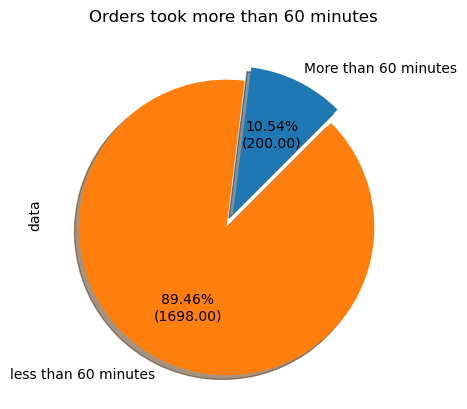

In [33]:
#Add a new column to the dataframe for total time taken from order to delivery of the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
print(f"Percentage of order taken more than 60 minutes: {len(df[df['total_time']>60]) / len(df) * 100}")
df_pie = pd.DataFrame({'key': ['More than 60 minutes', 'less than 60 minutes'],
                       'data':[len(df[df['total_time']>60]), len(df[df['total_time']<=60])]})
print(df_pie)
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{:.2f}%\n({:.2f})'.format(pct, val)
    return my_format

df_pie.set_index('key', inplace=True)
pie_values= [i for i in df_pie['data']]
df_pie.plot.pie(y='data', title=f'Orders took more than 60 minutes',
                legend=False, autopct=autopct_format(pie_values), explode=(0, 0.1), 
                shadow=True, startangle=45)
plt.show()

#### Observations:
    - From the above analysis, around 10% of the orders took longer than 60 minutes to deliver from the time of preperation to the time of delivery to the customer.


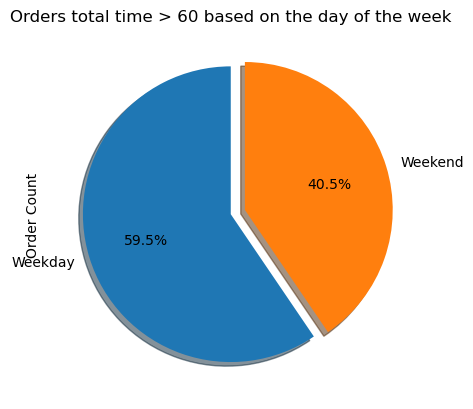

In [34]:
# Order total time greater than 60 minutes and categorized based on day of the week.
df_more_than_60 = df[df['total_time']>60]
df_pie = pd.DataFrame({'order_day': ['Weekday', 'Weekend'], 
                       'Order Count':[df_more_than_60[df_more_than_60['day_of_the_week']=='Weekday'].value_counts().count(),
                               df_more_than_60[df_more_than_60['day_of_the_week']=='Weekend'].value_counts().count()]})
df_pie.set_index('order_day', inplace=True)
df_pie.plot.pie(y='Order Count', title='Orders total time > 60 based on the day of the week',
                legend=False, autopct='%1.1f%%', explode=(0, 0.1), 
                shadow=True, startangle=90)
plt.show()

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [35]:
# importing plotly
import plotly.express as px
# Plot delivery time series using plotly (box and scatter plot with annotation) for date of the week
fig = px.box(df, x="day_of_the_week", y="delivery_time", points="all")
fig.show()

Mean delivery time during weekdays and weekends:
  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


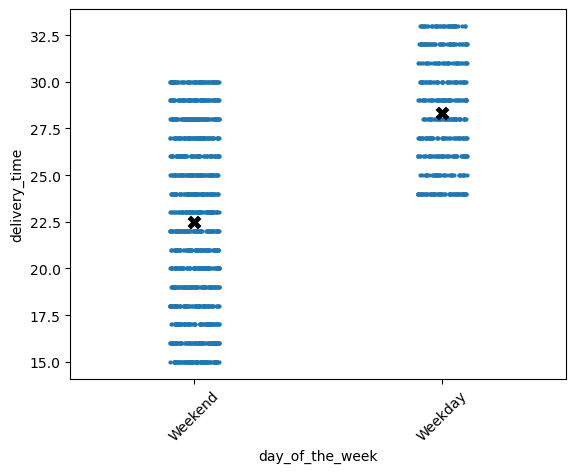

In [36]:
# Plot the mean delivery time for each day of the week.
ax = sns.stripplot(x="day_of_the_week", y="delivery_time", data=df, size=3)
df_means = df.groupby("day_of_the_week")["delivery_time"].agg("mean").reset_index()
print(f'Mean delivery time during weekdays and weekends:\n{df_means}')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
sns.swarmplot(x="day_of_the_week", y="delivery_time", marker='X', color='black', s=10, zorder=3, ax=ax, legend=False, data=df_means)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xticks(rotation=45)
plt.show()

#### Observations:
- Average weekday delivery time is atleast 6 minutes more than weekend
- Average weekday delivery time is around 28.34 minutes
- Average weekend delivery time is around 22.47 minutes


### Conclusion and Recommendations

### Conclusions:
We have analyzed the dataset of about 1898 orders in a given place with 178 unique restaurants and 14 distinct cuisines among the restaurants. The data is categorized as weekday and weekend orders. The primary goal of this analysis is to find the most popular restaurants and cuisines among the restaurants based on the orders and rating provided by the customers. 

* The analysis shows that the most popular restaurant is "Shake Shack" with 219 orders which is of "American" cuisine and the most popular cuisine is "American" with 368 total orders.
* There are around 109 restaurants with less than 5 orders and 50 restaurants with just one order.
* The delivery service is quite popular during the weekends(71.2%) compared to weekdays(28.8%).
* The food preparation time and delivery time is very similar to all restaurants. With mean and median very close
* Unfortunately we don't have customer rating for almost 38.78% orders.
* Higher profit margin orders i.e. order price higher than $20 are around 81.71% than the lower profit margin orders.

### Recommendations:

* 5.74% of the restaurants has less than 5 orders in total. These restaurants are not recommended if the duration of the entry is longer. Maybe these restaurants can offer promotions to atract more orders.
* Customers love "American" restaurants, explore adding more American restaurants to the list.
* Orders during weekdays are very less compared to weekends, need to explore the reasoning behind the weekdays, is it because not many customer to order food, or less delivery drivers or not many restuarants in the order service. Explore the reason behind it.
* Customers are ready to spend more than $20 for the food, which yields more revenue margin as well. Consider adding more restaurants of higher profit margin.
* Encourage customers to leave rating by promotions such as discounts to better provide recommendations based on ratings

---